<a href="https://colab.research.google.com/github/Pradeep1070/MAGIC-Gamma-Telescope-Signal-detection-a-Classification/blob/main/fcc_Magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
# from sklearn.neighbors import KNeighborsClas7sifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Practises/magic04.data'

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv(file_path,names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df['class'] = (df['class'] == 'g').astype(int)

In [ ]:
for label in df[:-1]:
  plt.figure(figsize=(5,3.5))
  plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True) #density normalizes two distributions and makes easier to comapre. ex: 200 vs 10 bar hight not easy to comapre
  plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('probabability')
  plt.xlabel(label)
  plt.legend()
  plt.show()


### Train test data

In [ ]:
train, test, valid = np.split(df.sample(frac=1), [int(0.6*(len(df))), int(0.8*(len(df)))])
# df.sample(frac=1) is used to randomly shuffle the rows of the DataFrame.
# The parameter frac=1 means that it will sample the entire DataFrame, effectively shuffling all the rows.

In [ ]:
def scaleData(dataFrame, Oversample=False):
  X = dataFrame[dataFrame.columns[:-1]].values
  y = dataFrame[dataFrame.columns[-1]].values

  sc = StandardScaler()
  X = sc.fit_transform(X)

  if Oversample == True:
    os = RandomOverSampler()
    X,y = os.fit_resample(X,y) #says take more from y's less label and oversample

  # X is 2d but y is 1d has to reshape for hstack
  mergedNDarray =  np.hstack((X, np.reshape(y, (-1,1)))) #-1 infers. same as using len(y) instead

  return mergedNDarray, X, y


train, xTrain, yTrain = scaleData(train, Oversample=True)
valid, xValid, yValid = scaleData(valid, Oversample=False) #unssen data shouldnt be ove sampled
test, xTest, yTest = scaleData(test, Oversample=False)

###KNN

In [ ]:
knnModel = KNeighborsClassifier(n_neighbors=10)
knnModel.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
print(classification_report(knnModel.predict(xTest), yTest))

              precision    recall  f1-score   support

           g       0.90      0.85      0.88      2606
           h       0.71      0.79      0.75      1198

    accuracy                           0.83      3804
   macro avg       0.81      0.82      0.81      3804
weighted avg       0.84      0.83      0.84      3804



###Naive Bayes

In [ ]:
nbModel = GaussianNB().fit(xTrain,yTrain)
print(classification_report(nbModel.predict(xTest),yTest))

              precision    recall  f1-score   support

           0       0.39      0.64      0.49       808
           1       0.88      0.73      0.80      2996

    accuracy                           0.71      3804
   macro avg       0.64      0.69      0.65      3804
weighted avg       0.78      0.71      0.74      3804



In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
xTrainMNB=MinMaxScaler().fit_transform(xTrain)
xTestMNB=MinMaxScaler().fit_transform(xTest)

In [ ]:
nbModel = MultinomialNB().fit(xTrainMNB,yTrain)
print(classification_report(nbModel.predict(xTestMNB),yTest))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1365
           1       0.82      0.83      0.83      2439

    accuracy                           0.78      3804
   macro avg       0.76      0.75      0.76      3804
weighted avg       0.78      0.78      0.78      3804



###Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lrModel = LogisticRegression().fit(xTrain,yTrain)
print(classification_report(lrModel.predict(xTest),yTest))

              precision    recall  f1-score   support

           g       0.83      0.85      0.84      2404
           h       0.73      0.69      0.71      1400

    accuracy                           0.79      3804
   macro avg       0.78      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [ ]:
lrModel.predict([xTest[0]])[0]

'g'

### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svmModel = SVC().fit(xTrain,yTrain)
print(classification_report(svmModel.predict(xTest),yTest))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1304
           1       0.91      0.88      0.90      2500

    accuracy                           0.87      3804
   macro avg       0.85      0.86      0.85      3804
weighted avg       0.87      0.87      0.87      3804



### Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
print(df['class'].unique())
print(len(df.columns))

[1 0]
11


In [ ]:
nnModel = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(len(df.columns)-1,), activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

nnModel.compile(
    loss = 'binary_crossentropy',
    # optimizer = 'adam',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)

# nnModel.fit(xTest, yTrain, epochs=5)

In [ ]:
history = nnModel.fit(
    xTrain, yTrain,
    batch_size=32, #min*i batch gradient decent happening
    epochs = 100,
    validation_split=0.2,
    verbose=0 #dont print anything
    )

In [ ]:
def plotAccuracy(history):
  plt.plot(history.history['accuracy']),
  plt.plot(history.history['val_accuracy'])
  plt.title('accuracy')-
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(['train', 'test'])
  plt.grid(True)
  plt.show()

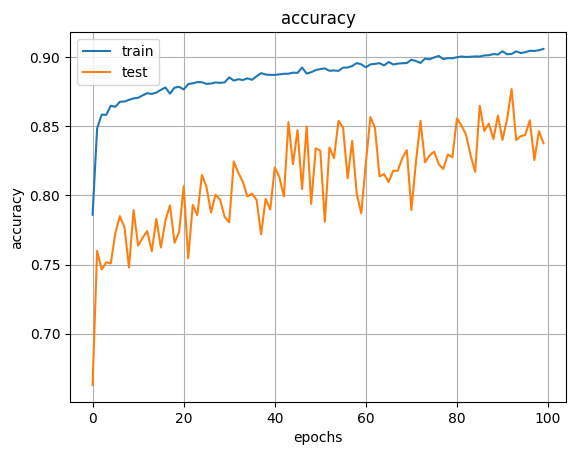

In [ ]:
plotAccuracy(history)

In [ ]:
def plotHistory(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4)) #1 row and 2 columns for the graph.
  # the result of the plt.subplots function is a figure (fig) and an array of axes (ax1 and ax2 in this case).
  # Since we have specified 1 row and 2 columns, the axes are arranged in a 1x2 grid.

  # summarize history for accuracy
  ax1.plot(history.history['accuracy'], label='accuracy')
  ax1.plot(history.history['val_accuracy'], label='val_accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')
  ax1.legend(['train', 'test'], loc='upper left')
  ax1.grid(True)

  # summarize history for loss
  ax2.plot(history.history['loss'], label='loss')
  ax2.plot(history.history['val_loss'], label='val_loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['train', 'test'], loc='upper left')
  ax2.grid(True)

  plt.show()

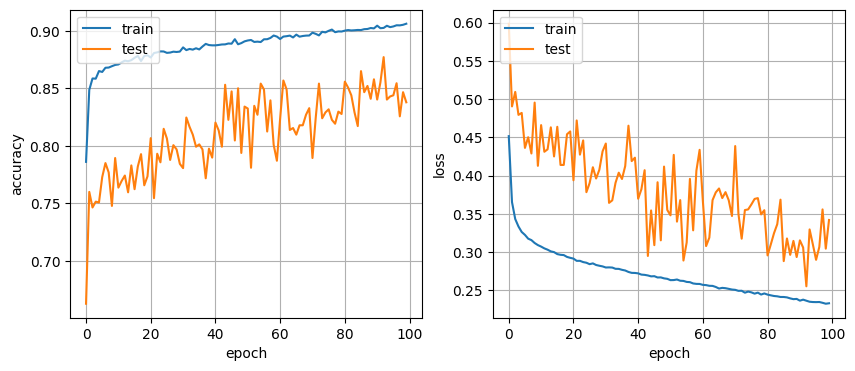

In [ ]:
plotHistory(history)

### NN optimizer

In [ ]:
def trainNN(num_nodes, dropout_prob, batch_size, lr, train_set, test_set, num_epochs):
  nnModel = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, input_shape=((train_set.shape[1]),), activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation = 'sigmoid'),
  ])

  nnModel.compile(
      loss = 'binary_crossentropy',
      optimizer = tf.keras.optimizers.Adam(lr),
      metrics = ['accuracy']
  )

  history = nnModel.fit(
      train_set, test_set,
      epochs=num_epochs,
      batch_size=batch_size,
      validation_split=0.2,
      verbose=0
      )
  return nnModel,history
# nnModel.fit(xTest, yTrain, epochs=5)

32 nodes, dropout 0, lr 0.01, batch size 32


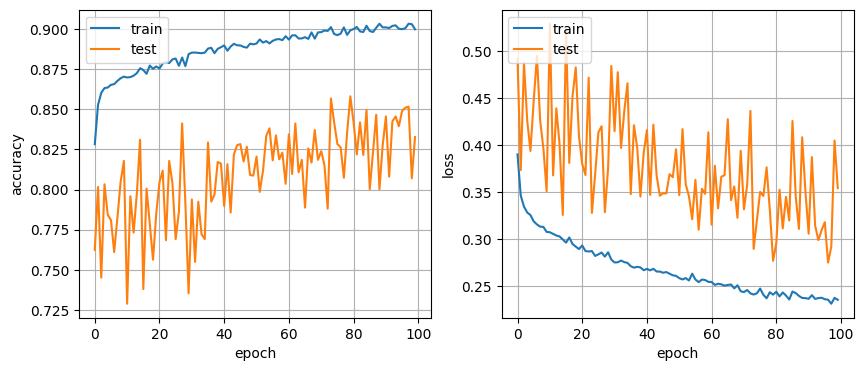

119/119 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8751
32 nodes, dropout 0, lr 0.005, batch size 32


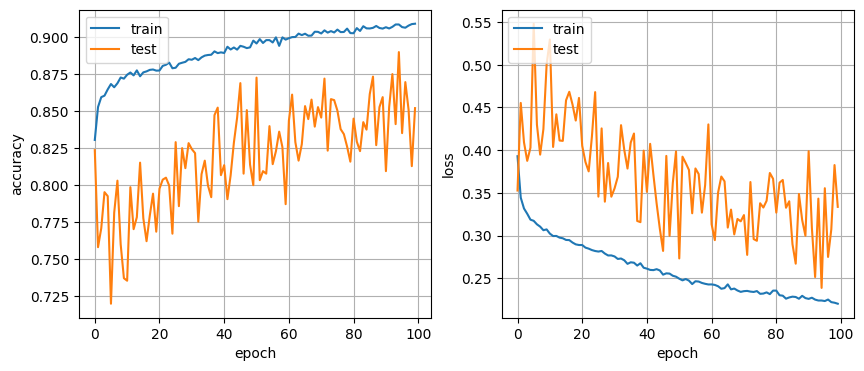

119/119 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8670
32 nodes, dropout 0, lr 0.001, batch size 32


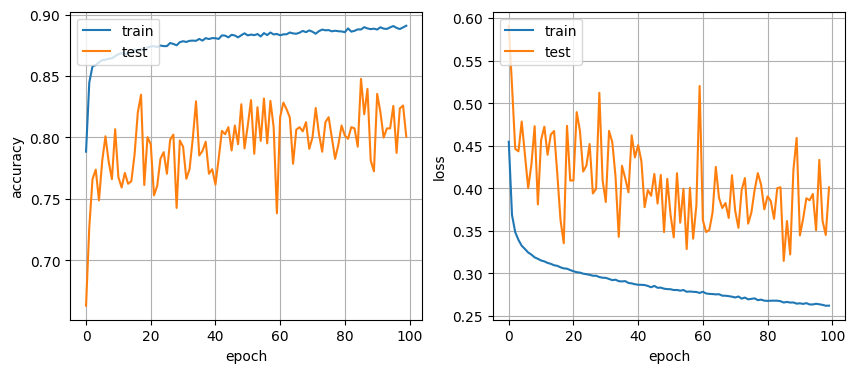

119/119 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8738
32 nodes, dropout 0, lr 0.01, batch size 64


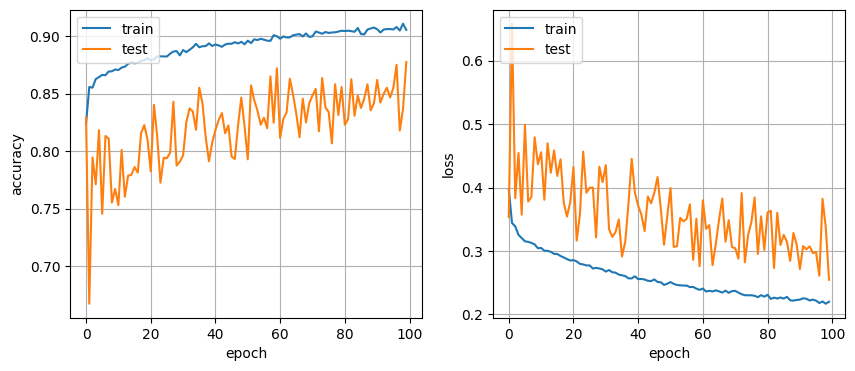

119/119 [==============================] - 0s 1ms/step - loss: 0.3890 - accuracy: 0.8559
32 nodes, dropout 0, lr 0.005, batch size 64


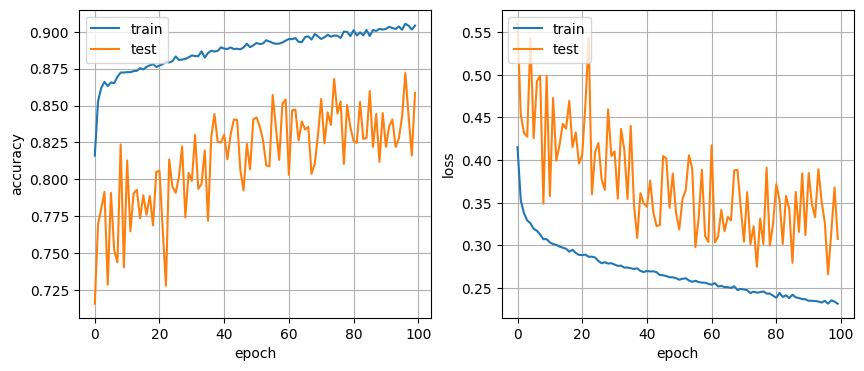

119/119 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8665
32 nodes, dropout 0, lr 0.001, batch size 64


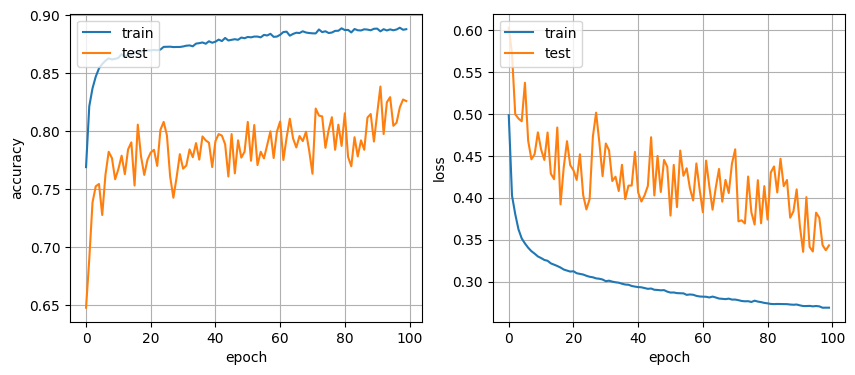

119/119 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8683
32 nodes, dropout 0, lr 0.01, batch size 128


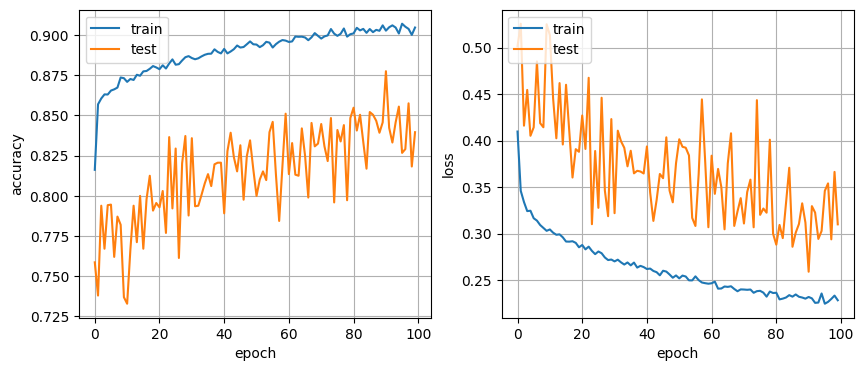

119/119 [==============================] - 0s 2ms/step - loss: 0.3664 - accuracy: 0.8567
32 nodes, dropout 0, lr 0.005, batch size 128


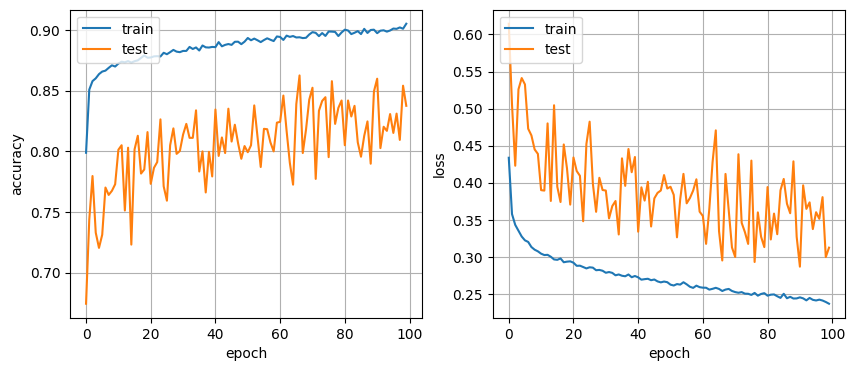

119/119 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8599
32 nodes, dropout 0, lr 0.001, batch size 128


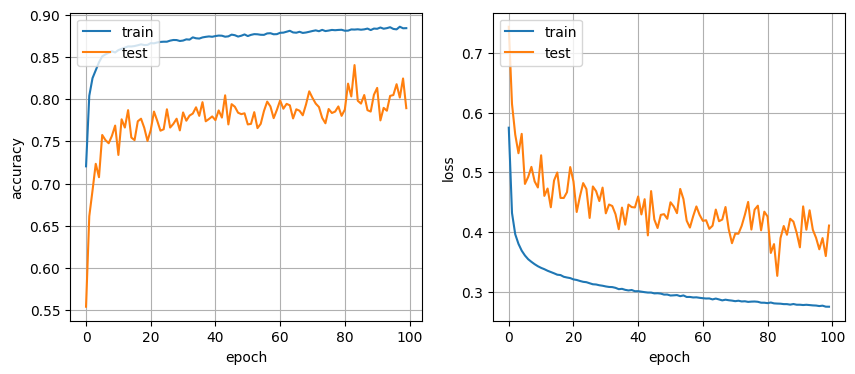

119/119 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8717
32 nodes, dropout 0.2, lr 0.01, batch size 32


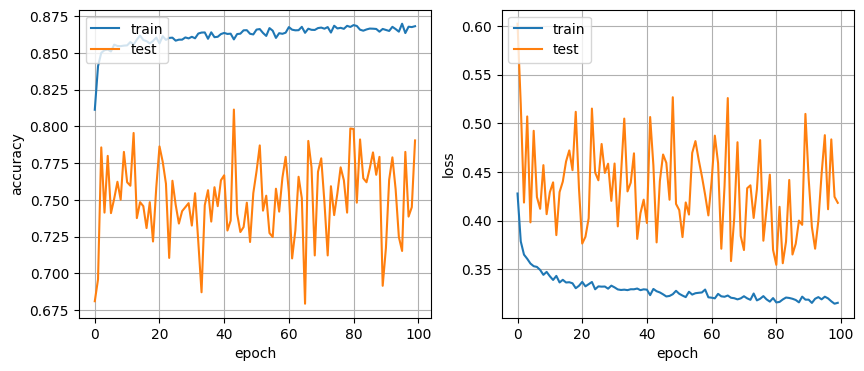

119/119 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.8791
32 nodes, dropout 0.2, lr 0.005, batch size 32


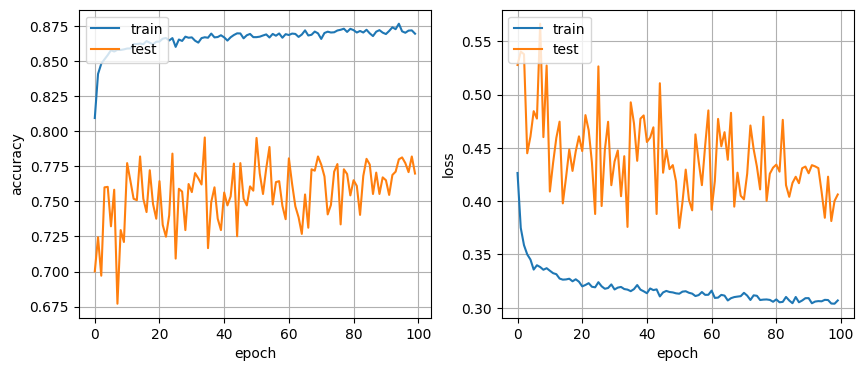

119/119 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8712
32 nodes, dropout 0.2, lr 0.001, batch size 32


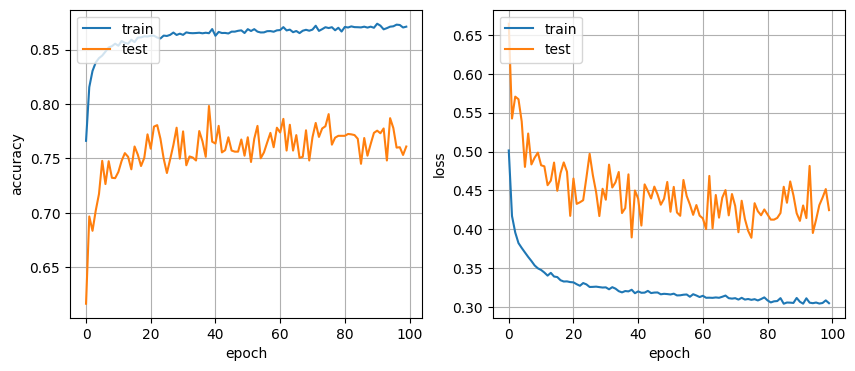

119/119 [==============================] - 0s 3ms/step - loss: 0.2895 - accuracy: 0.8809
32 nodes, dropout 0.2, lr 0.01, batch size 64


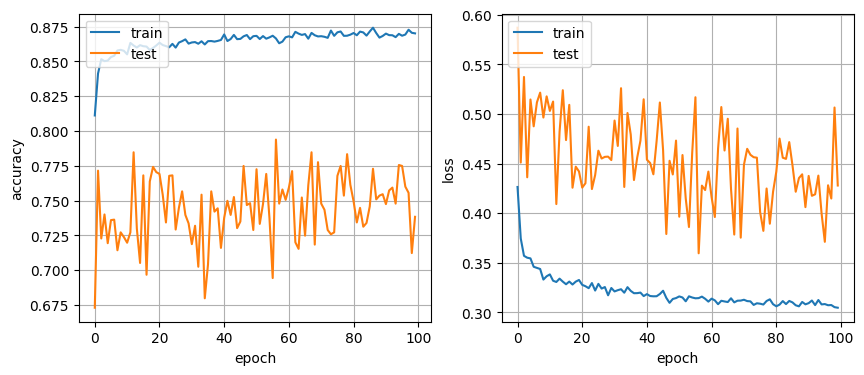

119/119 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.005, batch size 64


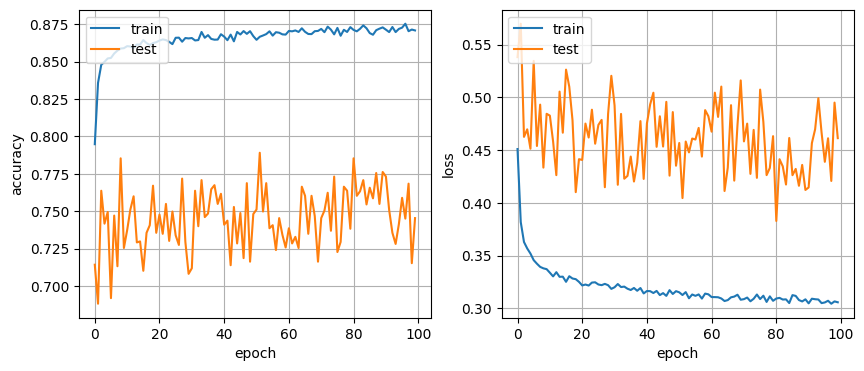

119/119 [==============================] - 0s 3ms/step - loss: 0.2962 - accuracy: 0.8749
32 nodes, dropout 0.2, lr 0.001, batch size 64


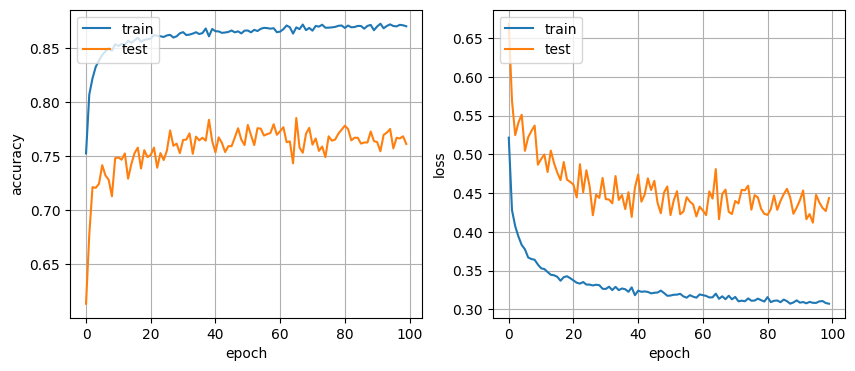

119/119 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.8791
32 nodes, dropout 0.2, lr 0.01, batch size 128


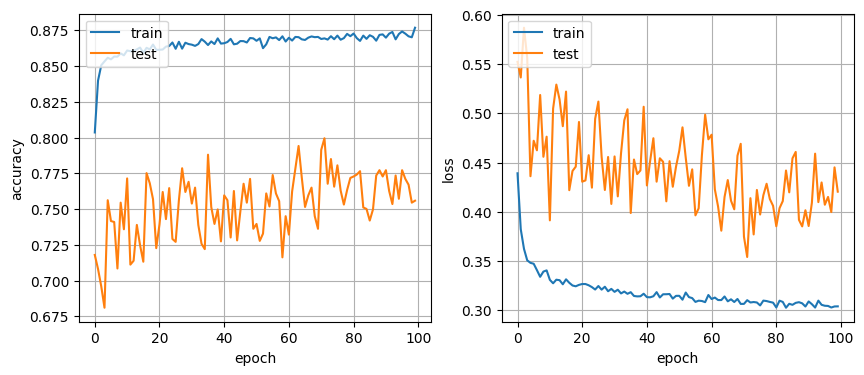

119/119 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8738
32 nodes, dropout 0.2, lr 0.005, batch size 128


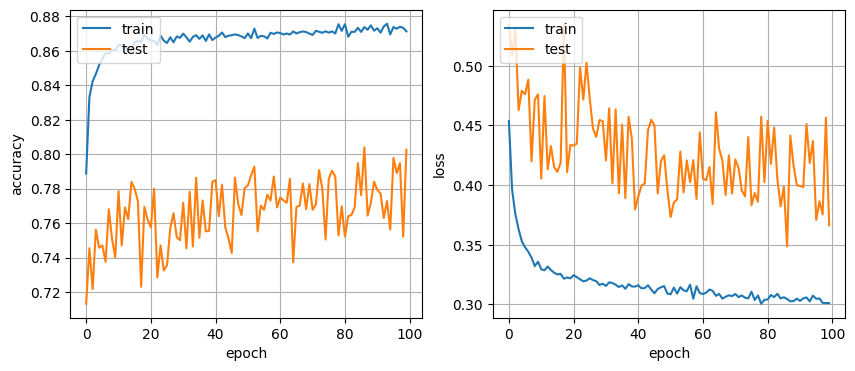

119/119 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.8751
32 nodes, dropout 0.2, lr 0.001, batch size 128


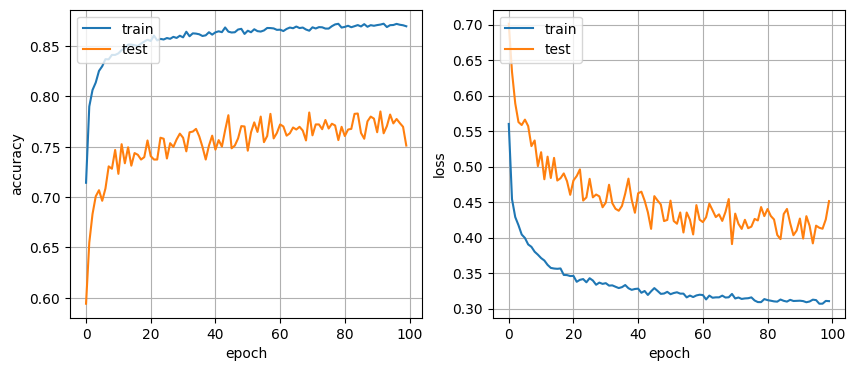

119/119 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.8778
64 nodes, dropout 0, lr 0.01, batch size 32


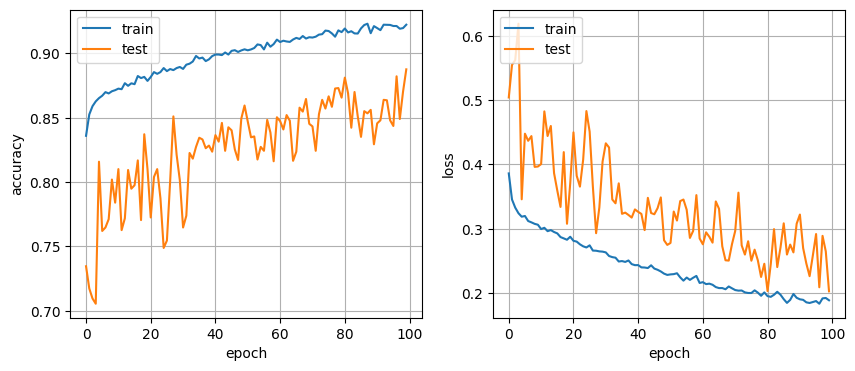

119/119 [==============================] - 0s 3ms/step - loss: 0.5441 - accuracy: 0.8502
64 nodes, dropout 0, lr 0.005, batch size 32


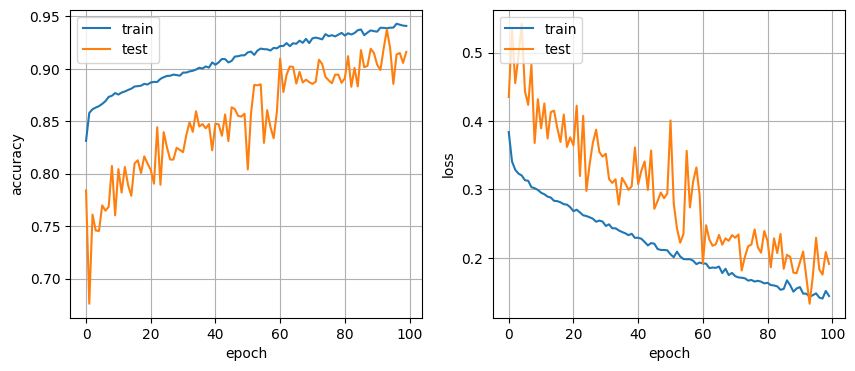

119/119 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.8552
64 nodes, dropout 0, lr 0.001, batch size 32


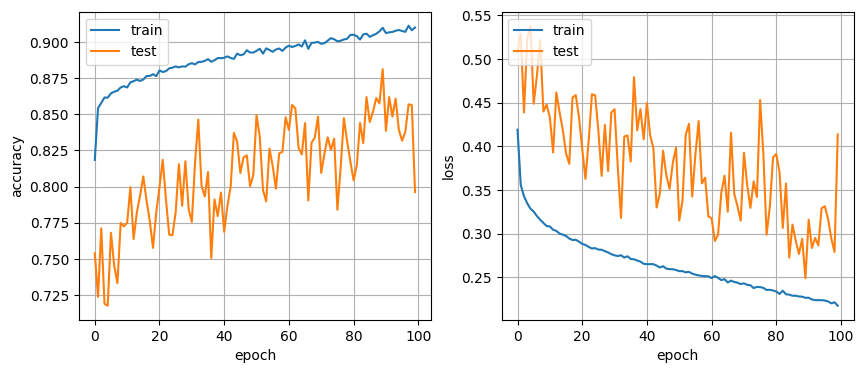

119/119 [==============================] - 0s 3ms/step - loss: 0.3359 - accuracy: 0.8736
64 nodes, dropout 0, lr 0.01, batch size 64


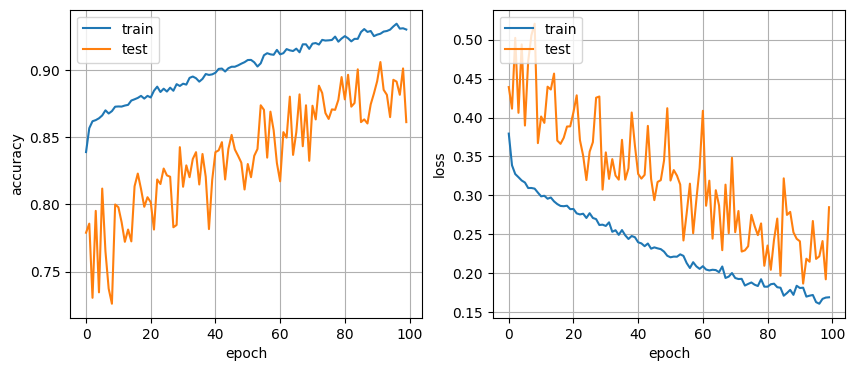

119/119 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.8641
64 nodes, dropout 0, lr 0.005, batch size 64


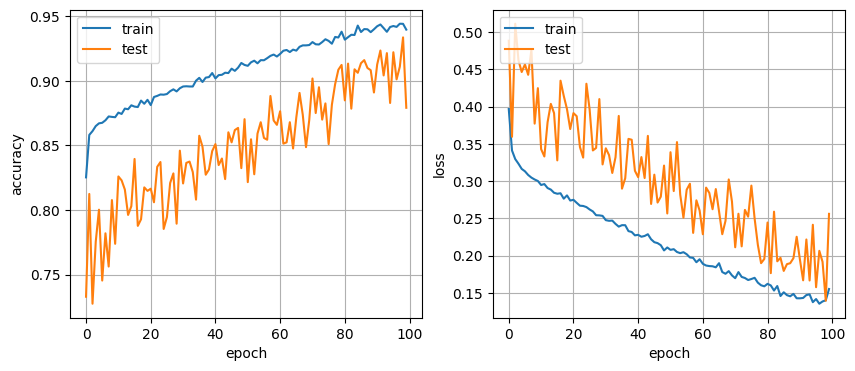

119/119 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.8546
64 nodes, dropout 0, lr 0.001, batch size 64


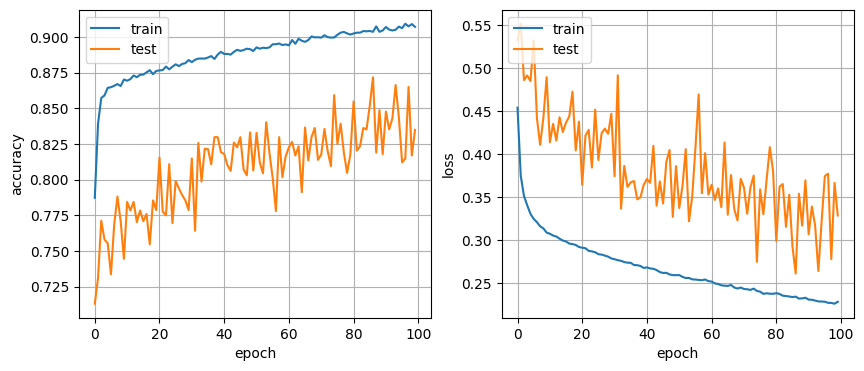

119/119 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8704
64 nodes, dropout 0, lr 0.01, batch size 128


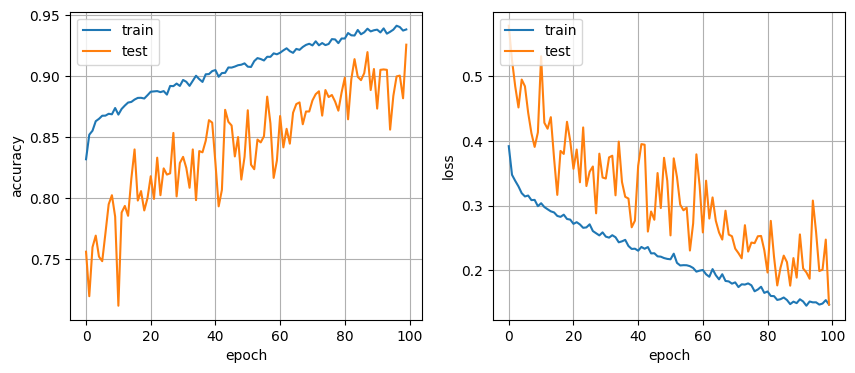

119/119 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.8404
64 nodes, dropout 0, lr 0.005, batch size 128


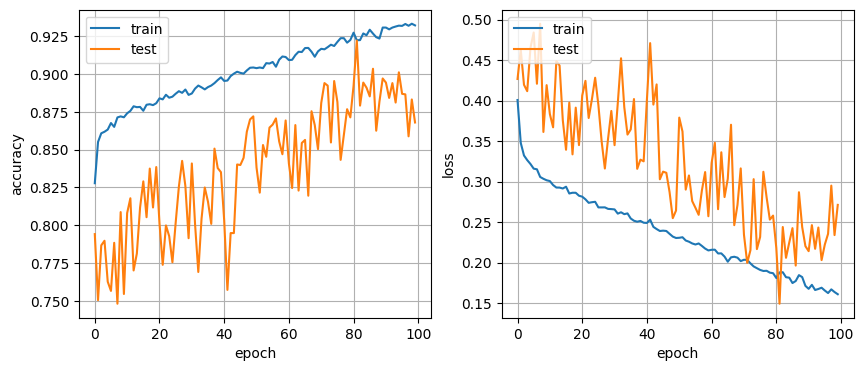

119/119 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.8481
64 nodes, dropout 0, lr 0.001, batch size 128


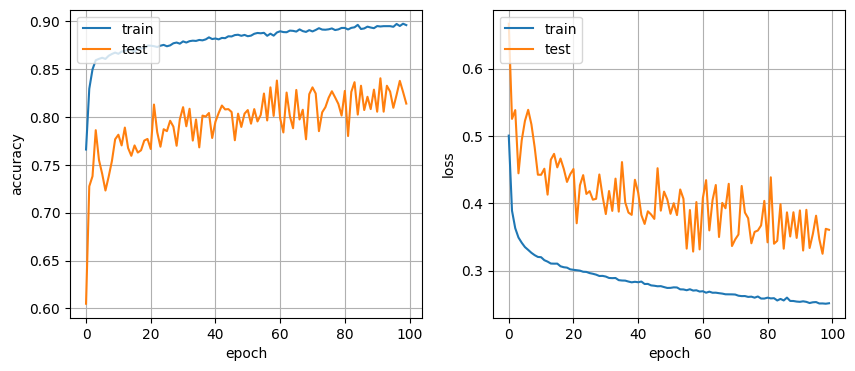

119/119 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8696
64 nodes, dropout 0.2, lr 0.01, batch size 32


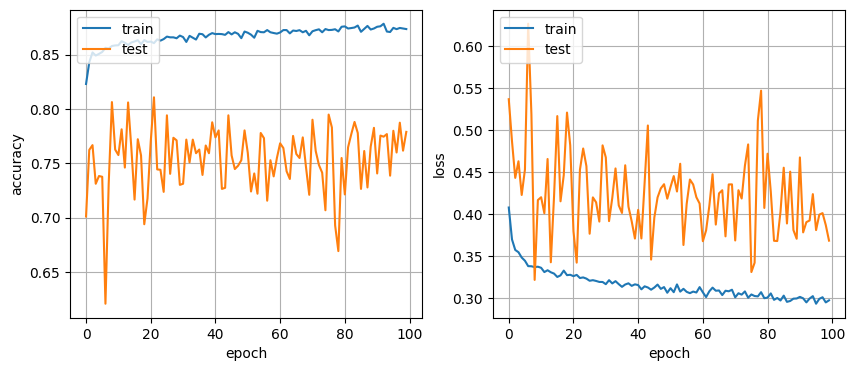

119/119 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8764
64 nodes, dropout 0.2, lr 0.005, batch size 32


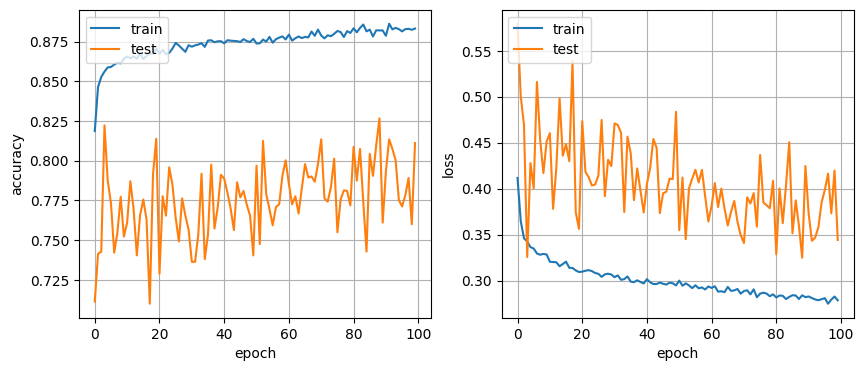

119/119 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.8749
64 nodes, dropout 0.2, lr 0.001, batch size 32


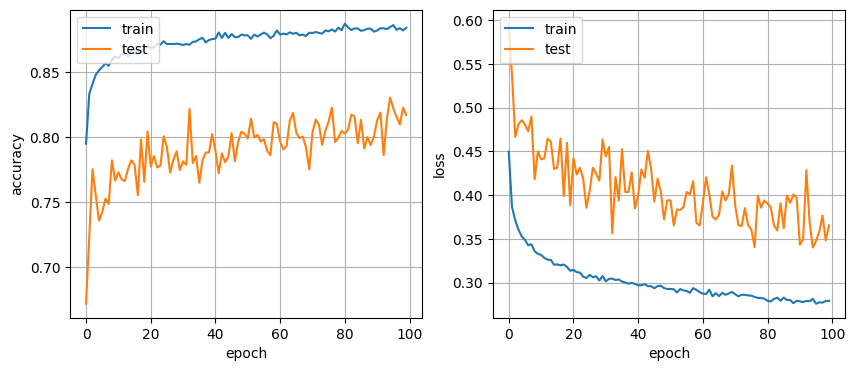

119/119 [==============================] - 0s 3ms/step - loss: 0.2870 - accuracy: 0.8751
64 nodes, dropout 0.2, lr 0.01, batch size 64


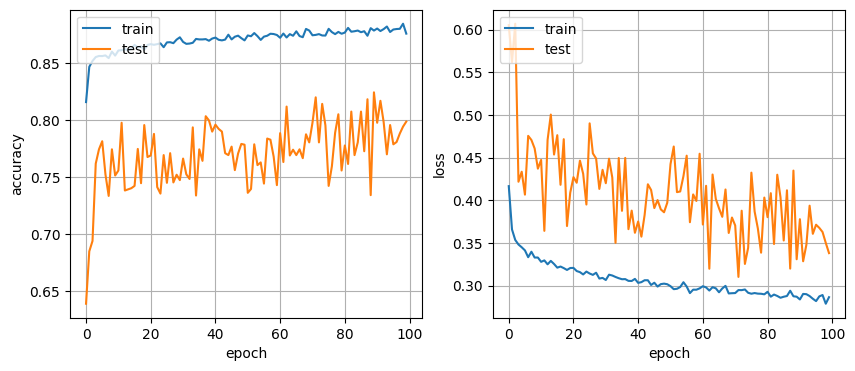

119/119 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8804
64 nodes, dropout 0.2, lr 0.005, batch size 64


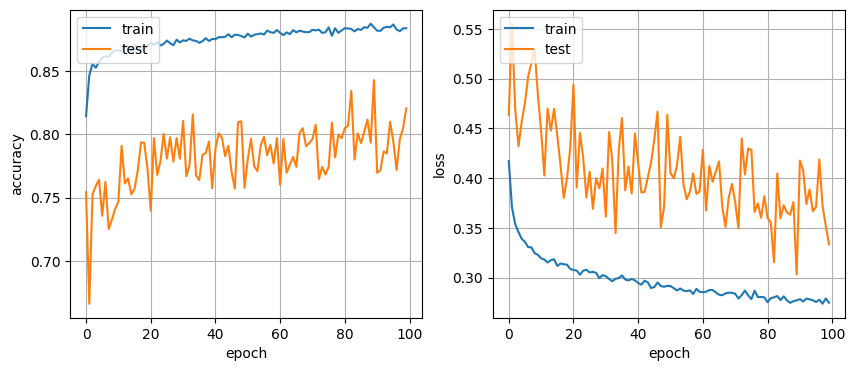

119/119 [==============================] - 0s 2ms/step - loss: 0.2995 - accuracy: 0.8699
64 nodes, dropout 0.2, lr 0.001, batch size 64


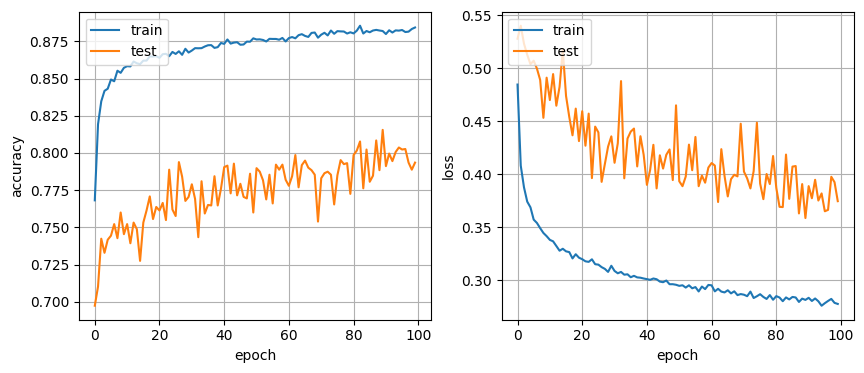

119/119 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.8809
64 nodes, dropout 0.2, lr 0.01, batch size 128


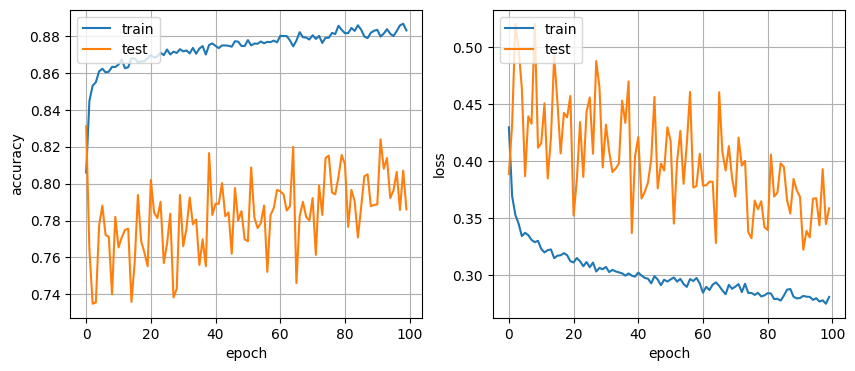

119/119 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.8770
64 nodes, dropout 0.2, lr 0.005, batch size 128


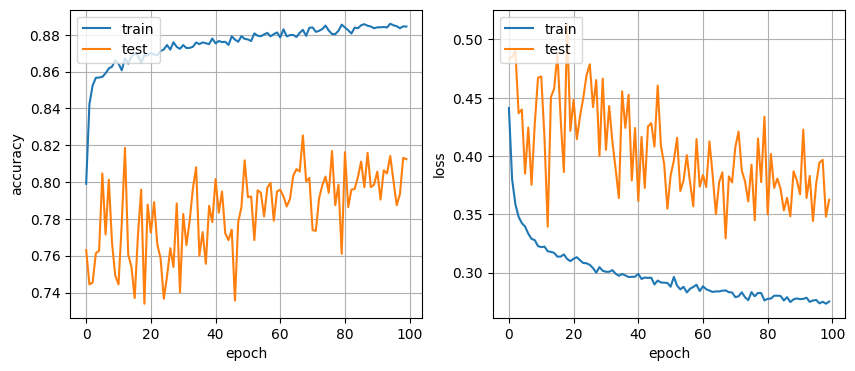

119/119 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.8812
64 nodes, dropout 0.2, lr 0.001, batch size 128


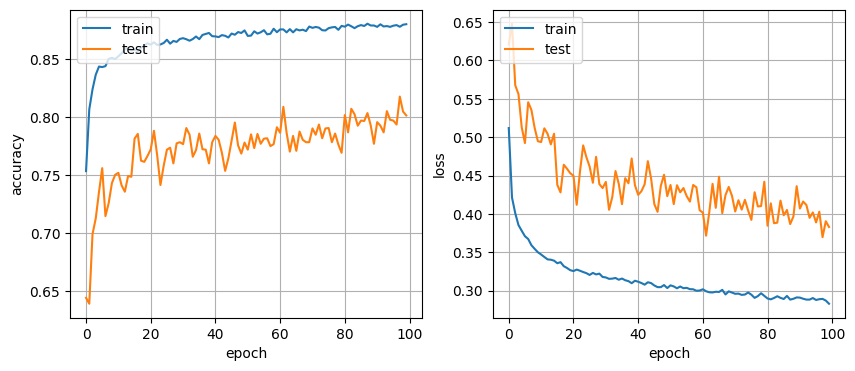

119/119 [==============================] - 0s 2ms/step - loss: 0.2885 - accuracy: 0.8801
128 nodes, dropout 0, lr 0.01, batch size 32


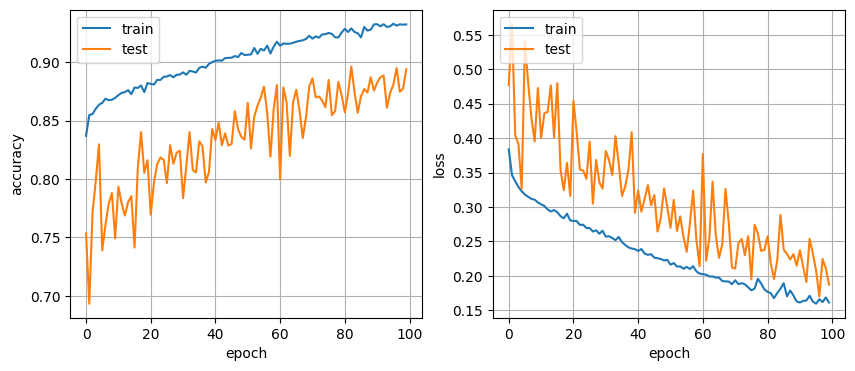

119/119 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.8541
128 nodes, dropout 0, lr 0.005, batch size 32


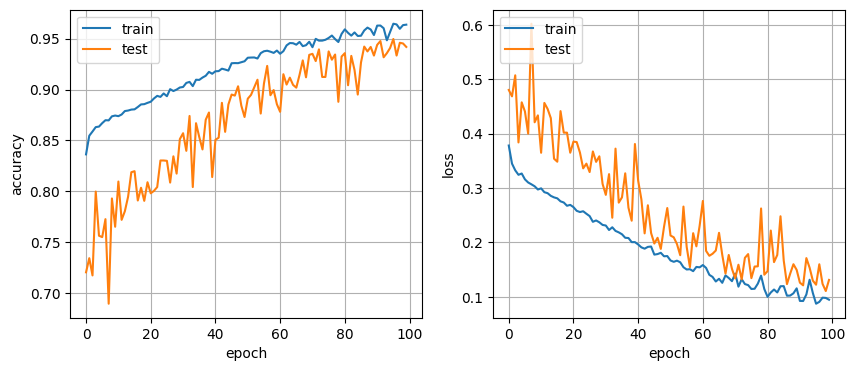

119/119 [==============================] - 0s 3ms/step - loss: 0.9034 - accuracy: 0.8454
128 nodes, dropout 0, lr 0.001, batch size 32


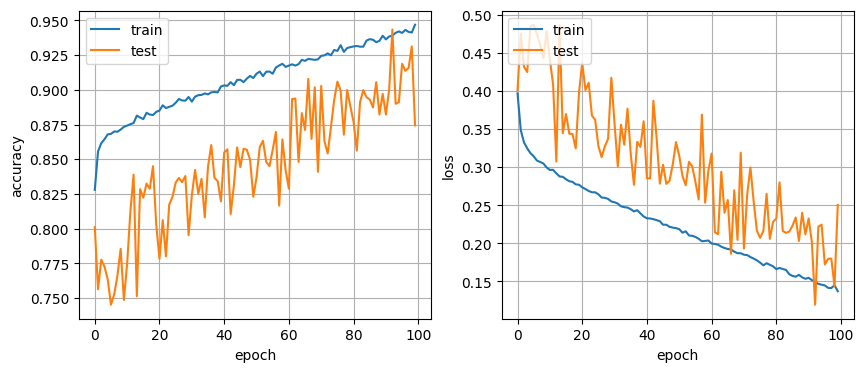

119/119 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8649
128 nodes, dropout 0, lr 0.01, batch size 64


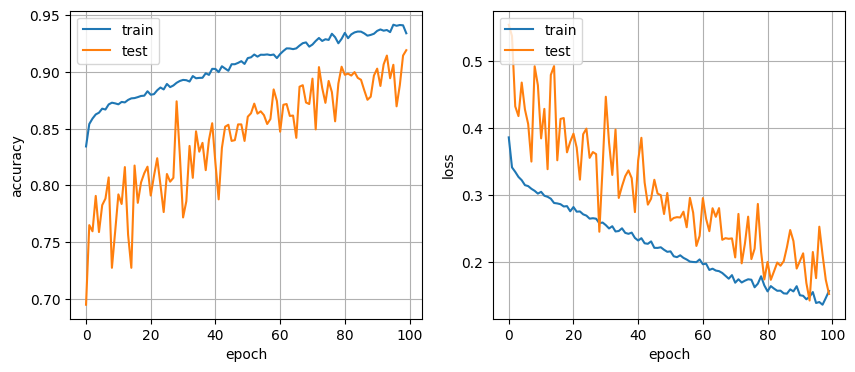

119/119 [==============================] - 0s 3ms/step - loss: 0.6360 - accuracy: 0.8486
128 nodes, dropout 0, lr 0.005, batch size 64


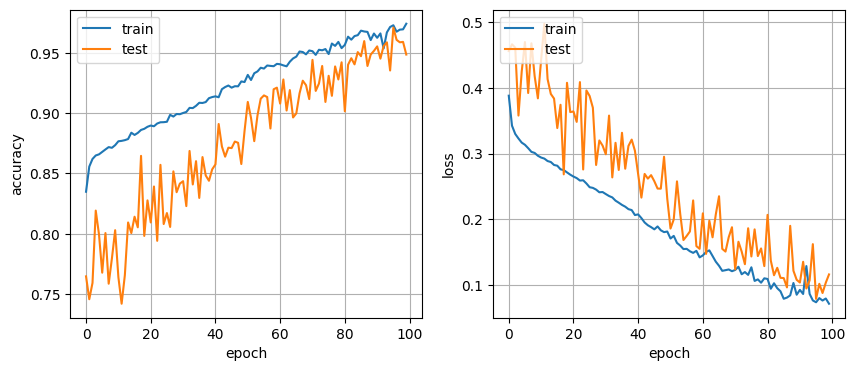

119/119 [==============================] - 0s 2ms/step - loss: 0.8808 - accuracy: 0.8486
128 nodes, dropout 0, lr 0.001, batch size 64


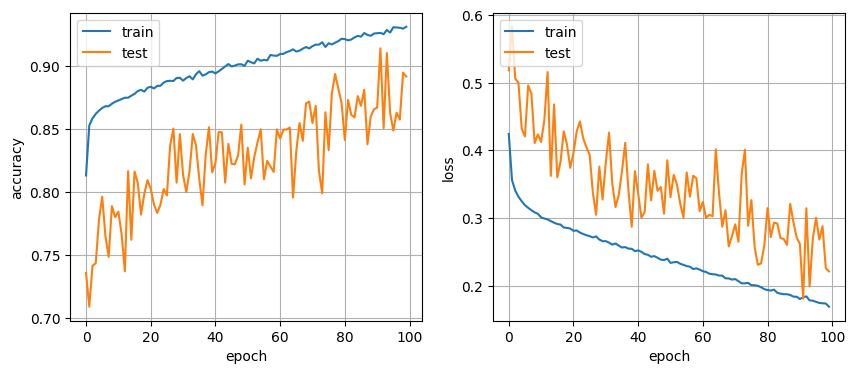

119/119 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8646
128 nodes, dropout 0, lr 0.01, batch size 128


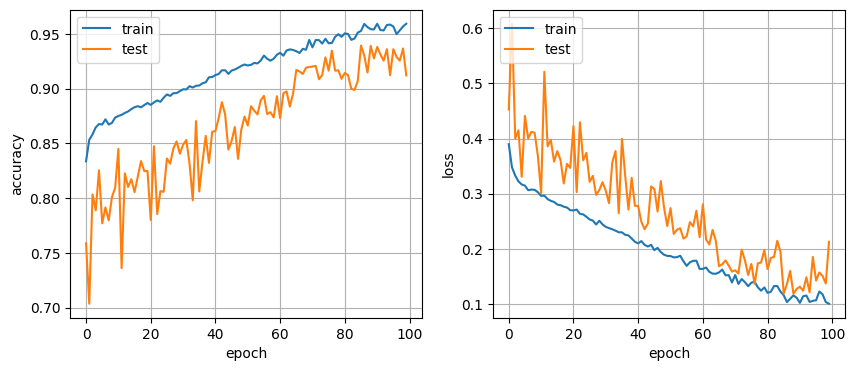

119/119 [==============================] - 0s 3ms/step - loss: 0.7997 - accuracy: 0.8591
128 nodes, dropout 0, lr 0.005, batch size 128


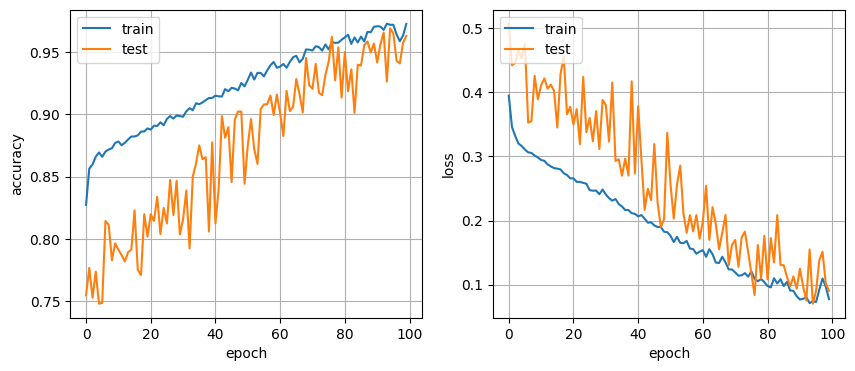

119/119 [==============================] - 0s 2ms/step - loss: 0.7237 - accuracy: 0.8446
128 nodes, dropout 0, lr 0.001, batch size 128


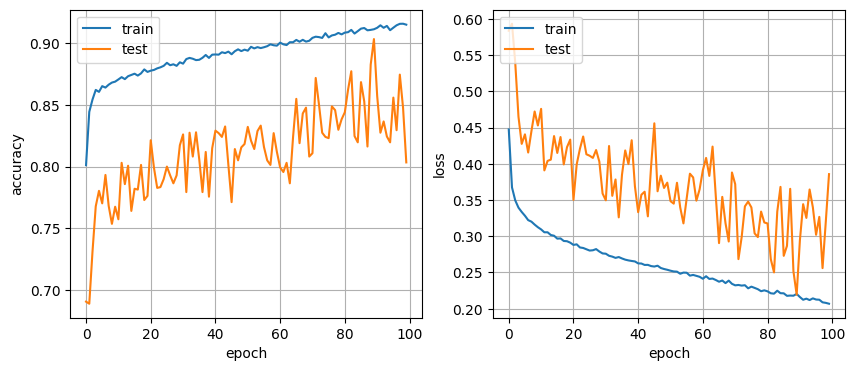

119/119 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8678
128 nodes, dropout 0.2, lr 0.01, batch size 32


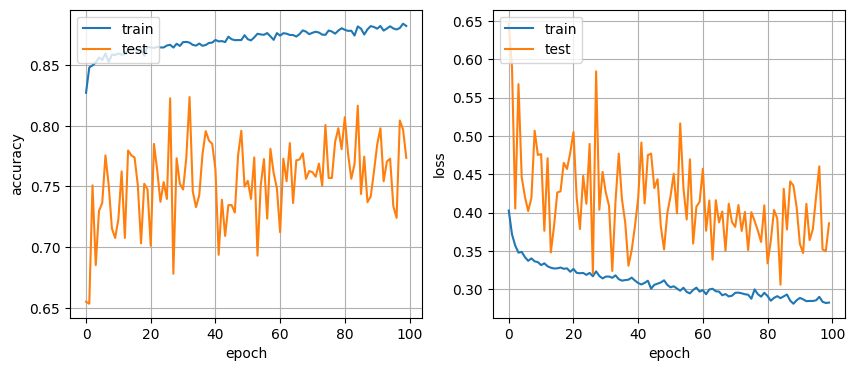

119/119 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.8796
128 nodes, dropout 0.2, lr 0.005, batch size 32


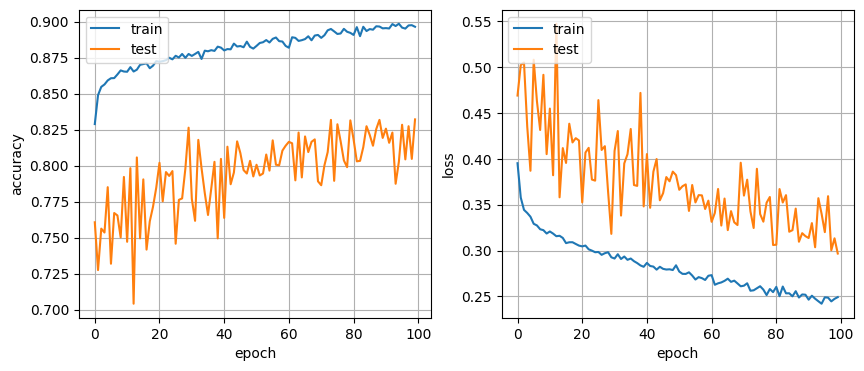

119/119 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.8733
128 nodes, dropout 0.2, lr 0.001, batch size 32


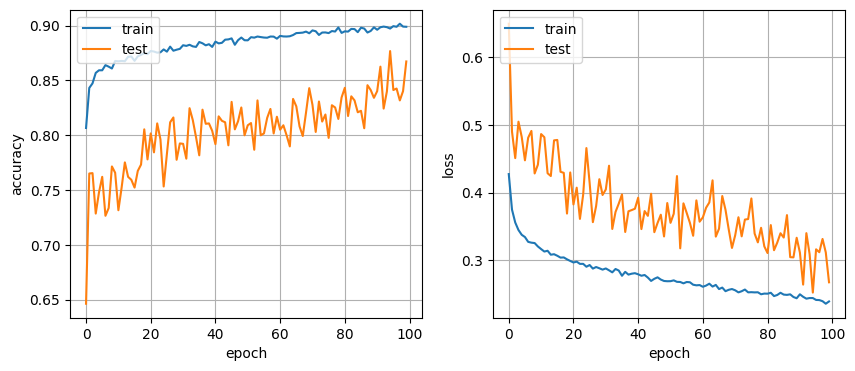

119/119 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8680
128 nodes, dropout 0.2, lr 0.01, batch size 64


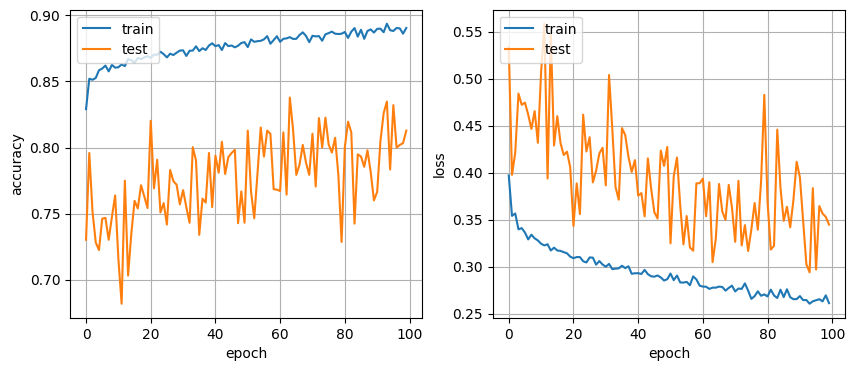

119/119 [==============================] - 0s 3ms/step - loss: 0.3032 - accuracy: 0.8738
128 nodes, dropout 0.2, lr 0.005, batch size 64


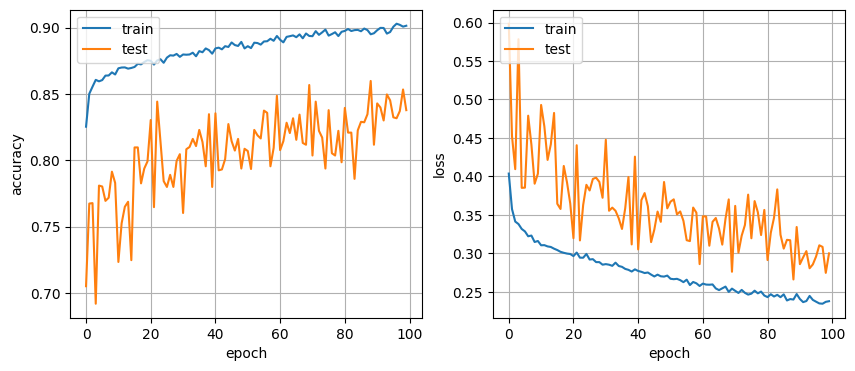

119/119 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8715
128 nodes, dropout 0.2, lr 0.001, batch size 64


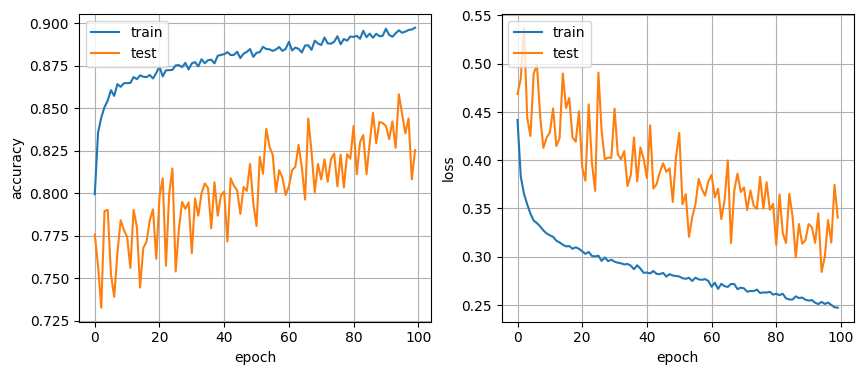

119/119 [==============================] - 0s 3ms/step - loss: 0.2929 - accuracy: 0.8778
128 nodes, dropout 0.2, lr 0.01, batch size 128


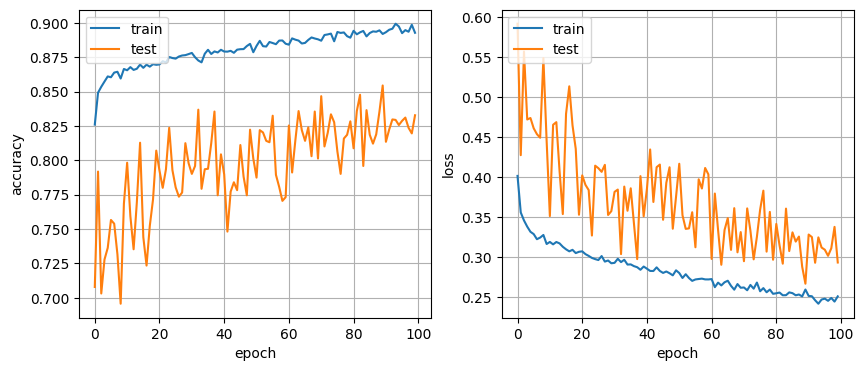

119/119 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8749
128 nodes, dropout 0.2, lr 0.005, batch size 128


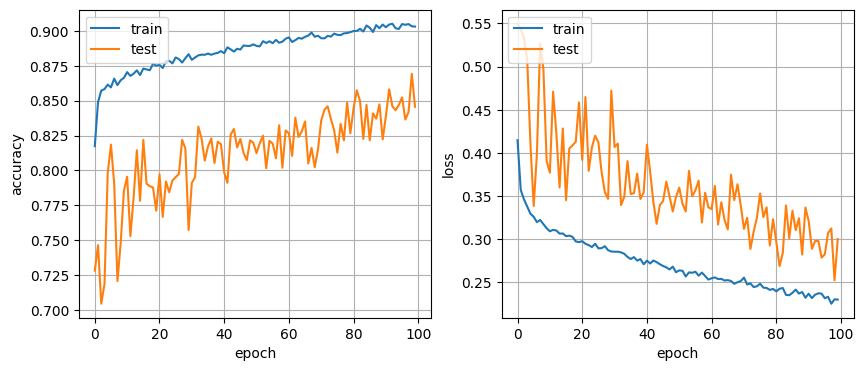

119/119 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.8762
128 nodes, dropout 0.2, lr 0.001, batch size 128


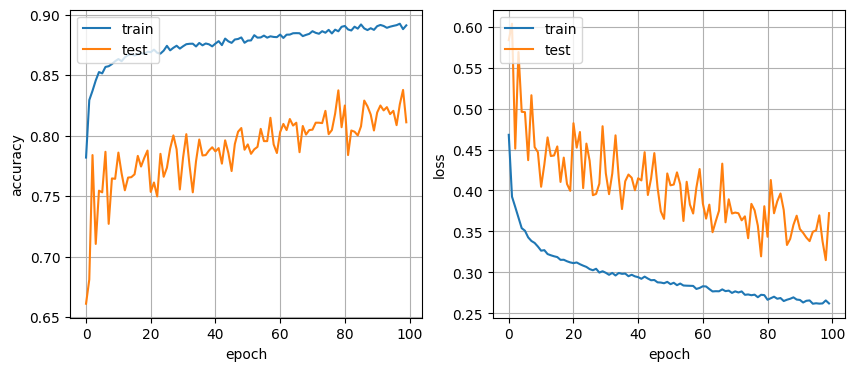

119/119 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.8772


In [ ]:
num_epochs = 100
least_val_loss = float('inf')
best_model = None
for num_nodes in [32,64,128]:
  for dropout_prob in [0,0.2]:
    for batch_size in [32,64,128]:
      for lr in [0.01,0.005,0.001]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model,history = trainNN(num_nodes, dropout_prob, batch_size, lr, xTrain, yTrain, num_epochs)
        plotHistory(history)
        val_loss = model.evaluate(xValid, yValid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          best_model = model